<a href="https://colab.research.google.com/github/BruDiGe/tutorial-MD/blob/main/MD_tutorial_biocatcode_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Molecular dyamics simulations workshop

Second session

Thursday 5th December 2024 (14:20-15:50)

# Introduction to Funnel Metadynamics Simulations with AMBER and PLUMED

-**Author:** Bruno Di Geronimo  
-**Contact:** bgeronimo3@gatech.edu  
-**Github:** https://github.com/BruDiGe/tutorial-MD.git  

## Useful links:
1 [AMBER](https://ambermd.org/index.php)

2 [PLUMED](https://www.plumed.org/doc-master/user-doc/html/index.html)


3 [Metadynamics](https://www.plumed.org/doc-master/user-doc/html/_m_e_t_a_d.html)


4 [Funnel-maker](https://github.com/dlukauskis/funnel_maker/blob/main/funnel_maker_tutorial.ipynb)



## References

* [1](https://pubs.acs.org/doi/10.1021/acs.jcim.6b00772)
* [2](https://pubs.acs.org/doi/10.1021/acs.jctc.0c00075)
* [3](https://pubs.acs.org/doi/10.1021/acs.jmedchem.4c00204)

## Index of Actions:

### 1. Instal Ambertools & parmed using CONDA



### 2. Brief introduction about what is Funnel Metadynamics



### 3. Metadynamics Simulation Visualization
Download from [link](https://github.com/BruDiGe/tutorial-MD/tree/main/03_metadynamics):

1. **HOLO:** 6GGI-A-GSS_equi.pdb


2. **Trajectory:** 6GGI-A-GSS_metad.dcd


### 4. Free Energy Surface analysis

Using **plumed**, we will obtaine the corresponding FES of our metadynamics, and analyze the results with **cpptraj**


### 5. Discussion and conclusions


# 1. Instal Ambertools & parmed using CONDA

The <span style="background-color: lightgrey;">pip</span> command is the Python package installer. It is used to install, manage, and update Python packages from the Python Package Index (PyPI) and other repositories.

In [ ]:
!pip install -q condacolab

In [ ]:
import condacolab
condacolab.install()

The <span style="background-color: lightgrey;">conda</span> command is a versatile tool for managing packages, dependencies, and environments in Python (and other languages). It is used in the Conda package management system, commonly associated with the Anaconda and Miniconda distributions.

In [ ]:
!conda --version

In [ ]:
!conda create --name AmberTools23

In [ ]:
!source activate base

In [ ]:
!conda install -c conda-forge ambertools=23

In [ ]:
!source activate AmberTools23

The <span style="background-color: lightgrey;">which</span> command is used to locate the executable file associated with a given command. It shows the full path of the executable.

In [ ]:
!which cpptraj

In [ ]:
!which tleap

In [ ]:
!pip install parmed

In [ ]:
!which parmed

# 2. Brief introduction about what is Funnel Metadynamics

**Funnel Metadynamics** is a specialized variation of the metadynamics method used in molecular dynamics (MD) simulations. It is designed to calculate free energy landscapes for binding events, such as ligand binding to a receptor, while significantly enhancing the sampling efficiency and reducing computational costs.

### Key Concept
In traditional metadynamics, a bias potential is added to accelerate sampling along selected **collective variables (CVs)**, but for ligand-binding studies, sampling the entire 3D space of the ligand around the receptor can be computationally expensive.  



Funnel metadynamics solves this problem by restricting the exploration space for the ligand to a funnel-shaped region around the binding site, thereby focusing the sampling and reducing unnecessary exploration of irrelevant areas


### How It Works
Funnel Shaped Restriction:

A funnel-like restraint is applied to the ligand's position relative to the receptor.
The funnel is narrow near the binding site and widens as you move away, mimicking the realistic space a ligand would explore near its target.

### Collective Variables (CVs):

Distance: Between the ligand and the binding site: pp.proj and pp.ext

![Figure 1](https://raw.githubusercontent.com/BruDiGe/tutorial-MD/main/03_metadynamics/figure1.jpeg)








# 3. Metadynamics Simulation Visualization

In order to visualize the constructed funnel, download [funnel.pse](https://github.com/BruDiGe/tutorial-MD/blob/main/03_metadynamics/funnel.pse) and open with PyMOL with File > Open ... There you can see what are the CV Projection on axis and CV extension on the axis, as well as UPPER_WALLS.  

---

Download files from [link](https://github.com/BruDiGe/tutorial-MD/tree/main/03_metadynamics):

  1. **HOLO:** 6GGI-A-GSS_equi.pdb


  1. **Trajectory:** 6GGI-A-GSS_metad.dcd

Open PyMOL and change working directory where you downloaded the files (File > Working Directory > Change ...)

Type in Pymol's Console:

load 6GGI-A-GSS_equi.pdb, metad


load_traj 6GGI-A-GSS_metad.dcd, metad



Take a look at the exit of substrate GSA from the active site, what interactions are relevant during the process and the whole picture of the process. What does go out first? the hydrophobic or hydrophilic GSA moiety?

# 4. Free Energy Surface analysis

We install first the colab-sh!

In [ ]:
!pip install colab-ssh
!which vim
!ls

Download fes.dat!

The **fes.dat** file in PLUMED contains the free energy surface **(FES)** computed during a simulation, typically as a function of one or more collective variables **(CVs)**. This file provides a tabulated representation of the free energy values corresponding to the sampled configurations of the system. **fes.dat** file is generated by  by reweighting the information stored in the **HILLS** file.


### Free Energy Reconstruction in Metadynamics

The **free energy surface (FES)** is reconstructed from the bias potential added during the simulation **(HILLS)**. The free energy as a function of the collective variable (\(s\)) is given by:

$$
F(s) = -\frac{1}{\beta} \ln P(s) + C
$$

Where:
- $s$: The collective variable (CV).
- $P(s)$: The probability of sampling $s$, which is enhanced by the bias potential.
- $\beta = \frac{1}{k_B T}$: The inverse thermal energy, where:
  - $k_B$: Boltzmann constant.
  - $T$: Absolute temperature of the system (in Kelvin).
- $C$: An arbitrary constant added to ensure the minimum free energy is zero.

### Example of Free Energy Surface

The following image illustrates a free energy surface (FES) from metadynamics:

<img src="https://pubs.acs.org/cms/10.1021/acs.jctc.4c00091/asset/images/medium/ct4c00091_0006.gif" alt="Free Energy Surface" />




---

#### Explanation:
- The **probability distribution** $P(s)$ is derived from the biased sampling and is related to the frequency with which the system visits specific values of the CV.
- The **bias potential** is designed to flatten the free energy barriers along the CV, allowing efficient sampling of high-energy states.
- The resulting free energy surface provides insights into the thermodynamics and kinetics of the system being studied, such as ligand binding or conformational changes.

---

#### Notes:
- In PLUMED, the `fes.dat` file contains the reconstructed free energy as a function of the CV(s).
- FES units are typically in kcal/mol or kJ/mol, depending on the simulation parameters. kJ/mol in this case.



References:
  * [1](https://www.plumed.org/doc-v2.9/user-doc/html/sum_hills.html)
  * [2](https://pubs.acs.org/doi/full/10.1021/acs.jctc.4c00091)


In [1]:
!curl -o fes.dat https://raw.githubusercontent.com/BruDiGe/tutorial-MD/main/03_metadynamics/fes.dat
!curl -o HILLS https://raw.githubusercontent.com/BruDiGe/tutorial-MD/main/03_metadynamics/HILLS
!ls -lrth

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2683k  100 2683k    0     0  3172k      0 --:--:-- --:--:-- --:--:-- 3171k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2468k  100 2468k    0     0  3512k      0 --:--:-- --:--:-- --:--:-- 3510k
total 5.1M
drwxr-xr-x 1 root root 4.0K Nov 22 14:23 sample_data
-rw-r--r-- 1 root root 2.7M Nov 26 15:46 fes.dat
-rw-r--r-- 1 root root 2.5M Nov 26 15:46 HILLS


We can simple take a look to **fes.dat**. & **HILLS** files using <span style="background-color: lightgrey;">head</span> command.

**HILLS** file contains the information: time, pp.proj (CV1), pp.ext (CV2), sigma_pp.proj sigma_pp.ext height (height of each HILL added) and biasf (well tempered metadynamics).

In [4]:
!head HILLS

#! FIELDS time pp.proj pp.ext sigma_pp.proj sigma_pp.ext height biasf
#! SET multivariate false
#! SET kerneltype stretched-gaussian
                      4      1.420286366542565     0.1452284504852976                  0.025                   0.03      4.050632911392405                     80
                      8      1.397617714856537     0.1462815742055651                  0.025                   0.03      4.000064583235865                     80
                     12      1.457791562131088     0.1418252126849934                  0.025                   0.03      4.022181354547142                     80
                     16      1.428346544162856     0.1298385930155404                  0.025                   0.03       3.92137804616433                     80
                     20      1.468466610036196     0.1590394612783686                  0.025                   0.03      3.964519788202422                     80
                     24      1.429567613556928     0.1634

**fes.dat** contains the information: pp.proj (CV1), pp.ext (CV2), file.free (Free Energy) and der_pp.proj der_pp.ext (not related).

In [6]:
!head -n 15 fes.dat

#! FIELDS pp.proj pp.ext file.free der_pp.proj der_pp.ext
#! SET min_pp.proj 0.900347
#! SET max_pp.proj 4.11232
#! SET nbins_pp.proj  365
#! SET periodic_pp.proj false
#! SET min_pp.ext -0.105946
#! SET max_pp.ext 0.92586
#! SET nbins_pp.ext  99
#! SET periodic_pp.ext false
    0.900347000   -0.105946000  218.160732925   -0.000000000   -0.000000000
    0.909171102   -0.105946000  218.160732925   -0.000000000   -0.000000000
    0.917995203   -0.105946000  218.160732925   -0.000000000   -0.000000000
    0.926819305   -0.105946000  218.160732925   -0.000000000   -0.000000000
    0.935643407   -0.105946000  218.160732925   -0.000000000   -0.000000000
    0.944467508   -0.105946000  218.160732925   -0.000000000   -0.000000000


### PLOT HILLS and FES files

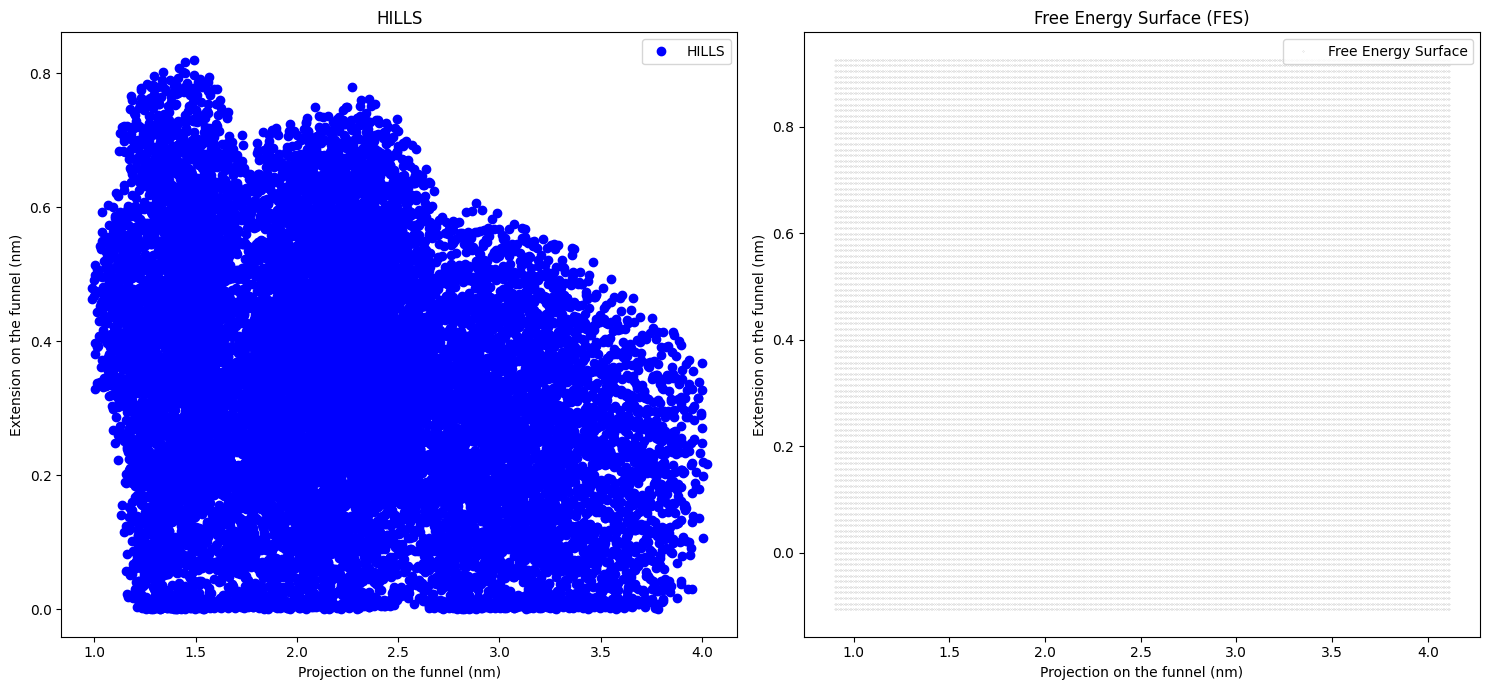

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load the uploaded files
file_hills = 'HILLS'
file_fes = 'fes.dat'

# Load the data from the files
data_hills = np.loadtxt(file_hills, skiprows=3)
data_fes = np.loadtxt(file_fes, skiprows=9)

# Extract proj (x-axis) and ext values (y-axis)
proj_hills = data_hills[:, 1]
ext_hills = data_hills[:, 2]

proj_fes = data_fes[:, 0]
ext_fes = data_fes[:, 1]

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Plot the HILLS on the left subplot
axes[0].plot(proj_hills, ext_hills, label='HILLS', color='blue', marker='o', linewidth=4, linestyle='')
axes[0].set_xlabel('Projection on the funnel (nm)')
axes[0].set_ylabel('Extension on the funnel (nm)')
axes[0].set_title('HILLS')
axes[0].legend()

# Plot the FES on the right subplot
axes[1].plot(proj_fes, ext_fes, label='Free Energy Surface', marker='.', color='grey', markersize=0.2, linestyle='')
axes[1].set_xlabel('Projection on the funnel (nm)')
axes[1].set_ylabel('Extension on the funnel (nm)')
axes[1].set_title('Free Energy Surface (FES)')
axes[1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

! Don't worry. Blue dots show where GSA molecule was exploring along the metadynamics, meanwhile FES show the integration along the entire surface, therefore we need a 3D plot!

### 3D PLOT including Energies

<ipython-input-8-ce44788be898>:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(data_file, delim_whitespace=True, header=None, skip_blank_lines=True, skiprows=9)


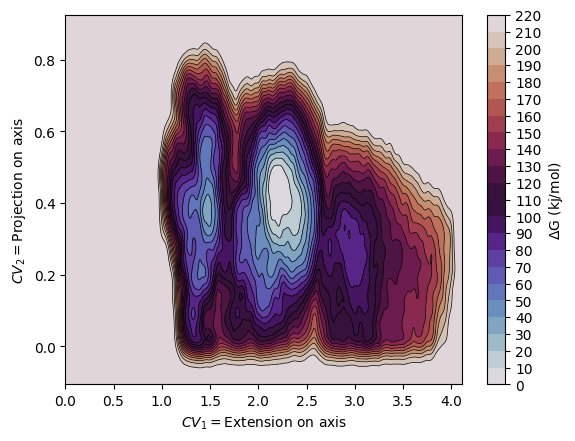

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

# Variables ===================================================================
#### Delete header lines from fes.dat
data_file = 'fes.dat'
figure_size = [12, 9]
dpi = 500

# Load Data ===================================================================
data = pd.read_csv(data_file, delim_whitespace=True, header=None, skip_blank_lines=True, skiprows=9)

x = (np.unique(data.iloc[:, 0]))
y = (np.unique(data.iloc[:, 1]))
z = np.asarray(data.iloc[:, 2]).reshape(len(y), len(x))

min_value = np.min(z)
max_value = np.max(z)

# Create figure ===============================================================
fig, ax = plt.subplots()
# Ensure X includes 0 and pad data for Z
if 0 not in x:
    x = np.insert(x, 0, 0)
    z_zero = z[:, 0]  # You can interpolate or use the first column as a proxy
    z = np.column_stack([z_zero, z])


bounds = np.arange(min_value, max_value + 10, 10)

# You can choose from various color palettes.==================================
# cmap = "viridis", "coolwarm", "YnBu", "magma", "RdYlBu_r", "Blues"

level_lines = ax.contourf(x, y, z, cmap='twilight', levels=bounds)  # Contour plot
ax.contour(x, y, z, colors='black', levels=bounds, linestyles='solid', linewidths=0.5)   # Black level lines

cbar= plt.colorbar(level_lines, ax=ax, ticks=bounds)

cbar.set_label('$\Delta$G (kj/mol)')

ax.set_xlim(left=0)  # Sets the lower limit of x-axis to 0


ax.set_xlabel(r'$CV_1 = \mathrm{Extension\ on\ axis}$')
ax.set_ylabel(r'$CV_2 = \mathrm{Projection\ on\ axis}$')
plt.show()

Identify the three corresponding minima.

### GSA analysis

# 5. Discussion and conclusions

[ParmEd](https://parmed.github.io/ParmEd/html/index.html) is a general tool for aiding in investigations of biomolecular systems using popular molecular simulation packages, like Amber, CHARMM, and OpenMM written in Python.

This software allow us to obtain al related information from topology files and modify it in case need it.



In [ ]:
!which parmed
!curl -o 6GGI-A-GSS.prmtop https://raw.githubusercontent.com/BruDiGe/tutorial-MD/main/02_parm/6GGI-A-GSS.prmtop
!ls -lrth
# Commands to run with parmed
# help
# summary
# printDetails :GSA
# printBonds :275
!parmed 6GGI-A-GSS.prmtop